# Import and Mount

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# NBA Player Data

## Loading Raptor since 1989

In [ ]:
per_season_raptor_df = pd.read_csv('/content/drive/Shareddrives/CS229_Final_Project_Data/NBA_Data/RAPTOR/historical_RAPTOR_by_player.csv')
per_season_raptor_df = per_season_raptor_df.drop(['raptor_offense', 'raptor_defense', 'war_total', 'war_reg_season', 'war_playoffs', 'predator_offense', 'predator_defense', 'predator_total', 'pace_impact'], axis=1)

per_season_raptor_df

,player_name,player_id,season,poss,mp,raptor_total
0,Alaa Abdelnaby,abdelal01,1991,640,303,-4.448526
1,Alaa Abdelnaby,abdelal01,1992,1998,959,-2.751792
2,Alaa Abdelnaby,abdelal01,1993,2754,1379,-4.443544
3,Alaa Abdelnaby,abdelal01,1994,320,159,-8.888368
4,Alaa Abdelnaby,abdelal01,1995,984,506,-5.114556
...,...,...,...,...,...,...
19154,Ivica Zubac,zubaciv01,2018,871,410,-0.214877
19155,Ivica Zubac,zubaciv01,2019,2345,1079,-0.548676
19156,Ivica Zubac,zubaciv01,2020,3447,1646,4.649308
19157,Ivica Zubac,zubaciv01,2021,3908,1910,1.616696


In [ ]:
per_season_raptor_df[per_season_raptor_df.raptor_total > 30]

,player_name,player_id,season,poss,mp,raptor_total
1745,Marques Bolden,boldema01,2020,7,3,34.130534
7292,Udonis Haslem,hasleud01,2021,7,3,47.473611
7711,Steven Hill,hillst01,2009,4,2,32.683786
10269,Cedric Lewis,lewisce01,1996,8,4,37.776924
10401,Ian Lockhart,lockhia01,1991,4,2,34.796960
11971,Naz Mitrou-Long,mitrona01,2018,3,1,72.622361
17265,Tyler Ulis,ulisty01,2019,2,1,45.667732
18110,Tyson Wheeler,wheelty01,1999,6,3,30.239569


## Calculating Power Metric

In [ ]:
df_sorted = per_season_raptor_df.sort_values(['player_name', 'raptor_total'], ascending=[True, False])
df_sorted.drop(['player_id', 'season', 'poss'], axis=1)

top_three_stats = df_sorted.groupby('player_name').head(3)
averages_df = top_three_stats.groupby('player_name').mean().reset_index()
stat_df = averages_df[['player_name', 'mp', 'raptor_total']].copy()
stat_df.rename(columns={'mp': 'three_mp', 'raptor_total': 'three_raptor'}, inplace=True)

stat_df['power'] = (stat_df['three_raptor'] * stat_df['three_mp'] + 6.24 * stat_df['three_mp']) / 10000
stat_df['power'] = stat_df['power'] - stat_df['power'].min()

stat_df = stat_df.sort_values(by='power', ascending=False).reset_index(drop=True)

stat_df

<ipython-input-73-49ba70e0f816>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averages_df = top_three_stats.groupby('player_name').mean().reset_index()


,player_name,three_mp,three_raptor,power
0,Michael Jordan,3811.333333,11.496325,7.374656
1,LeBron James,3456.333333,11.338624,6.690510
2,Larry Bird,3877.000000,8.521148,6.337649
3,Stephen Curry,3330.666667,10.912976,6.327836
4,John Stockton,3368.666667,10.226623,6.161808
...,...,...,...,...
3566,Derrick Alston,885.666667,-8.458172,0.418295
3567,Loren Meyer,686.000000,-9.499928,0.391120
3568,Kevin Knox,2158.000000,-8.142225,0.204251
3569,Anzejs Pasecniks,221.500000,-33.370240,0.013817


In [ ]:
stat_df.to_csv('/content/drive/Shareddrives/CS229_Final_Project_Data/power_rankings.csv',index=False)

### Graphing Distribution of Power

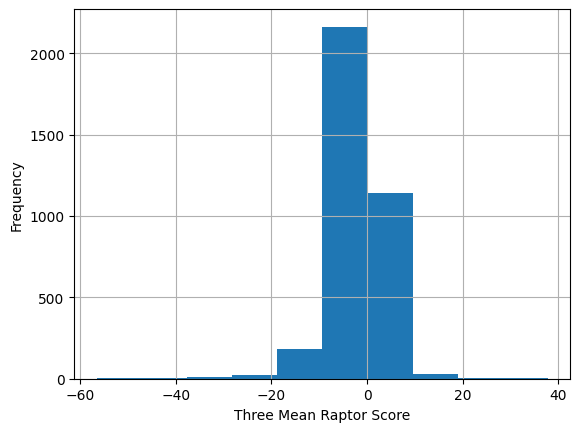

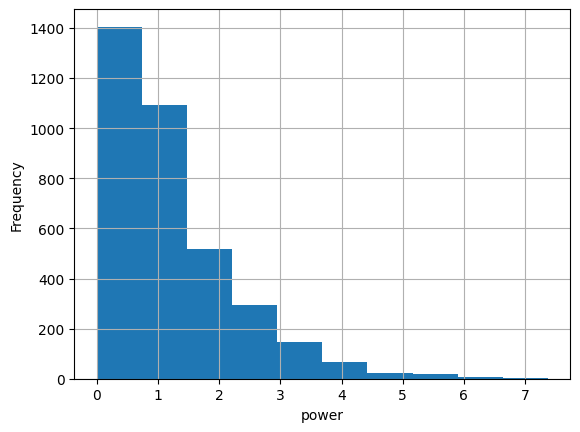

In [ ]:
stat_df['three_raptor'].hist()

# set labels for the x-axis and y-axis
plt.xlabel('Three Mean Raptor Score')
plt.ylabel('Frequency')

# show the plot
plt.show()

stat_df['power'].hist()

# set labels for the x-axis and y-axis
plt.xlabel('power')
plt.ylabel('Frequency')

# show the plot
plt.show()